In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
datagen = ImageDataGenerator(
    rescale=1. / 255,
    rotation_range = 30,
    width_shift_range = 0.25,
    height_shift_range = 0.25,
    shear_range = 15,
    zoom_range = [0.5, 1.5]
)

datagen_test=ImageDataGenerator(
    rescale=1. / 255,
)

The ***ImageDataGenerato***r function allows various changes to be made by generating new images to make the model more robust.

In [ ]:
train=datagen.flow_from_directory("/content/entrenamiento",
                                  target_size=(128,128),class_mode="binary")

Found 2023 images belonging to 2 classes.


In [ ]:
test=datagen_test.flow_from_directory("/content/test",
                                  target_size=(128,128),class_mode="binary")

Found 980 images belonging to 2 classes.


Assign a transformation of 128X128 to tend to a standard and not use bigger or smaller images besides assigning it a binary classfiifcation model in this case if the image belongs to a dog or a cat.

## **Model**

In [ ]:
import tensorflow as tf

In [ ]:
def build_model():

  model=tf.keras.Sequential([
                       
          tf.keras.layers.Conv2D(filters=32,kernel_size=3,input_shape=(128,128,3),activation="relu"),
          tf.keras.layers.BatchNormalization(),
          tf.keras.layers.MaxPool2D(),
          tf.keras.layers.Conv2D(filters=64,kernel_size=3,activation="relu"),
          tf.keras.layers.BatchNormalization(),
          tf.keras.layers.MaxPool2D(),
          tf.keras.layers.Conv2D(filters=64,kernel_size=3,activation="relu"),
          tf.keras.layers.BatchNormalization(),
          tf.keras.layers.MaxPool2D(),

          tf.keras.layers.Flatten(),
          tf.keras.layers.Dropout(rate=0.3),
          tf.keras.layers.Dense(units=128,activation="relu"),
          tf.keras.layers.Dense(units=1,activation="sigmoid")
    ])

  model.compile(loss="binary_crossentropy",optimizer="adam",metrics=["acc"])

  return model

* Conv2D: Take the most important features of the images.

* MaxPool2D: Max pooling is a sample-based discretization process. The objective is to down-sample an input representation (image, hidden-layer output matrix, etc.), reducing its dimensionality and allowing for assumptions to be made about features contained in the sub-regions binned.

* Flatten: Reduces the input data to a single dimension.

* Drouput: Deletes a certain amount of neurons, preventing the model from memorizing very specific data, forcing the model to look for new alternative routes to generate the prediction.

* Dense: Dense layers are the computation layers that connect each neuron in one layer to all the outputs of the previous layer,where I assign the activation function relu with the purpose of breaking the linearity of the data.

* Output Layers: I assigned the **sigmoid** function since it is used for binary classification as in this case.





In [ ]:
model=build_model()

In [ ]:
history=model.fit(train,
                  batch_size=4,
                  validation_data=test,
                  validation_batch_size=4,
                  epochs=100)

Epoch 1/100
64/64 [==============================] - 30s 280ms/step - loss: 0.8975 - acc: 0.5482 - val_loss: 2.1441 - val_acc: 0.5347
Epoch 2/100
64/64 [==============================] - 17s 266ms/step - loss: 0.6629 - acc: 0.6105 - val_loss: 3.1590 - val_acc: 0.5347
Epoch 3/100
64/64 [==============================] - 17s 268ms/step - loss: 0.6704 - acc: 0.5902 - val_loss: 1.2071 - val_acc: 0.5112
Epoch 4/100
64/64 [==============================] - 17s 272ms/step - loss: 0.6583 - acc: 0.6065 - val_loss: 1.4629 - val_acc: 0.4653
Epoch 5/100
64/64 [==============================] - 17s 273ms/step - loss: 0.6821 - acc: 0.6204 - val_loss: 1.5282 - val_acc: 0.4765
Epoch 6/100
64/64 [==============================] - 18s 276ms/step - loss: 0.6485 - acc: 0.6243 - val_loss: 0.7138 - val_acc: 0.5449
Epoch 7/100
64/64 [==============================] - 18s 275ms/step - loss: 0.6454 - acc: 0.6273 - val_loss: 0.7750 - val_acc: 0.4684
Epoch 8/100
64/64 [==============================] - 17s 273ms

We start training the model where to go in a batch of 4 images and it will have a total of 100 epochs for it to learn the algorithm.

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import warnings

In [ ]:
model.evaluate(train)

64/64 [==============================] - 14s 220ms/step - loss: 0.4000 - acc: 0.8112


[0.4000472128391266, 0.8111715316772461]

In [ ]:
model.evaluate(test)

31/31 [==============================] - 3s 93ms/step - loss: 0.4894 - acc: 0.8102


[0.48942843079566956, 0.8102040886878967]

In [ ]:
y_pred_test=model.predict(test).flatten())

In [ ]:
from tensorflow.keras.preprocessing.image import load_img,img_to_array

In [ ]:
def predict(img):

  x=load_img(img,target_size=(128,128,3))
  x=img_to_array(x)
  x=x/255
  x=np.expand_dims(x,axis=0)

  return model.predict(x)

Create a function that allows new predictions to be made.

In [ ]:
predict("/content/1650466413_240889_1650466661_noticia_normal_recorte1.jpg")

array([[0.5247845]], dtype=float32)

In [ ]:
test.class_indices

{'gato': 0, 'perro': 1}

In [ ]:
predict("/content/descarga.jfif")

array([[0.92068946]], dtype=float32)

In [ ]:
def history_epoch(x):

  sns.set_style(style="whitegrid")
  fig,(ax)=plt.subplots(1,1,figsize=(20,8))

  ax.plot(history.history[f"{x}"],label="Train")
  ax.plot(history.history[f"val_{x}"],label="Test")
  plt.legend()
  plt.show()

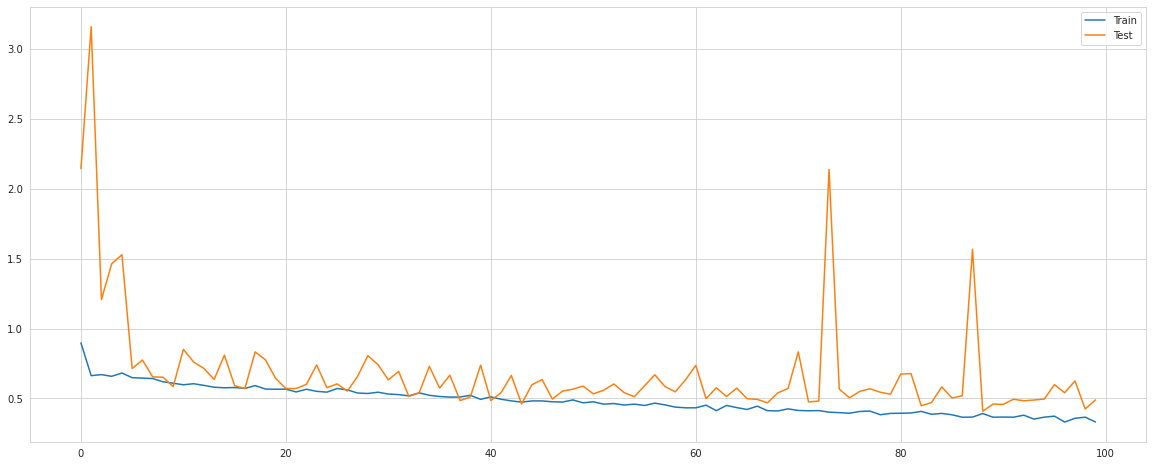

In [ ]:
history_epoch("loss")

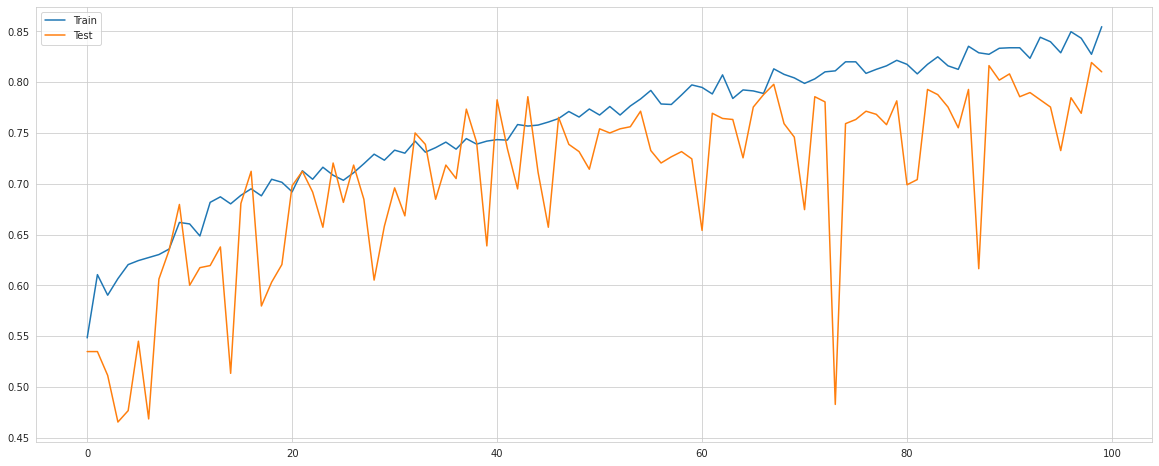

In [ ]:
history_epoch("acc")

Plot the missing function for the training and validation data to detect a possible overfitting of the model.

## **Save Model**

In [ ]:
model.save("dogs_cats_v1.h5")
model.save_weights("dogs_cats_v1_weights.h5")

Save the already trained model in order not to train it again.